<a id="1"></a> <br>
# Loading 

In [75]:
#loading and importing data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [76]:
df_train=pd.read_csv('/content/Labeled_Alert_Data.csv')

In [77]:
df_train

,Timestamp,Priority,Length,Rule_ID,Rule_message,Protocol,Source_IP,Source_port,Destination_IP,Destination_port,...,Payload_Lenght,TTL,ID,offset,Sequence,ACK,Window,Urgent_Pointer,TCP_flags,label
0,03/28-06:03:50.679274,1,1421,11,SNMP AgentX/tcp request,TCP,192.168.140.133,51021.0,192.168.140.128,705.0,...,39,0,58457,44,45056,NaN,NaN,NaN,NaN,Attack
1,03/28-06:03:50.737220,1,1418,11,SNMP request tcp,TCP,192.168.140.133,51021.0,192.168.140.128,161.0,...,39,0,30173,44,45056,NaN,NaN,NaN,NaN,Attack
2,03/28-06:03:57.083989,1,1419,9,SNMP trap udp,UDP,192.168.140.133,53981.0,192.168.140.128,162.0,...,49,0,23766,28,28672,NaN,NaN,NaN,NaN,Attack
3,03/28-06:03:57.083991,1,1417,9,SNMP request udp,UDP,192.168.140.133,53981.0,192.168.140.128,161.0,...,47,0,62685,88,90112,NaN,NaN,NaN,NaN,Attack
4,03/28-06:03:57.084042,1,402,7,ICMP Destination Unreachable Port Unreachable,ICMP,192.168.140.128,NaN,192.168.140.133,NaN,...,64,192,19088,56,57344,3.0,3.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033,03/27-12:38:55.484829,1,1418,11,SNMP request tcp,TCP,192.168.140.133,43345.0,192.168.140.2,161.0,...,40,0,17480,44,45056,NaN,NaN,NaN,NaN,Attack
6034,03/27-12:38:59.602726,1,1917,6,SCAN UPnP service discover attempt,UDP,192.168.140.1,54003.0,239.255.255.250,1900.0,...,1,0,34990,198,202752,NaN,NaN,NaN,NaN,Attack
6035,03/27-12:39:00.603982,1,1917,6,SCAN UPnP service discover attempt,UDP,192.168.140.1,54003.0,239.255.255.250,1900.0,...,1,0,34991,198,202752,NaN,NaN,NaN,NaN,Attack
6036,03/27-12:39:01.605193,1,1917,6,SCAN UPnP service discover attempt,UDP,192.168.140.1,54003.0,239.255.255.250,1900.0,...,1,0,34992,198,202752,NaN,NaN,NaN,NaN,Attack


In [78]:
# information of our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6038 entries, 0 to 6037
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           6038 non-null   object 
 1   Priority            6038 non-null   int64  
 2   Length              6038 non-null   int64  
 3   Rule_ID             6038 non-null   int64  
 4   Rule_message        6038 non-null   object 
 5   Protocol            6038 non-null   object 
 6   Source_IP           6038 non-null   object 
 7   Source_port         259 non-null    float64
 8   Destination_IP      6038 non-null   object 
 9   Destination_port    259 non-null    float64
 10  Source_MAC          6038 non-null   object 
 11  Destination_MAC     6038 non-null   object 
 12  Vlan_Id             6038 non-null   object 
 13  IPv6_Source         116 non-null    object 
 14  IPv6_Destination    116 non-null    object 
 15  IPv6_Traffic_Class  116 non-null    object 
 16  IPv6_F

<a id="2"></a> <br>
# Check for duplicates

In [79]:
print(df_train.duplicated().sum())

0


In [80]:
df_train['Source_port'] = df_train['Source_port'].fillna(0)
df_train['Destination_port'] = df_train['Destination_port'].fillna(0)

In [81]:
df_train.drop(['IPv6_Source'], axis=1,inplace=True)
df_train.drop(['IPv6_Destination'], axis=1,inplace=True)   
df_train.drop(['IPv6_Traffic_Class'], axis=1,inplace=True)
df_train.drop(['IPv6_Flow_Label'], axis=1,inplace=True)
df_train.drop(['Payload'], axis=1,inplace=True)  

In [82]:
df_train['ACK'] = df_train['Source_port'].fillna(0)
df_train['Window'] = df_train['Window'].fillna(0)
df_train['Urgent_Pointer'] = df_train['Urgent_Pointer'].fillna(0)
df_train['TCP_flags'] = df_train['TCP_flags'].fillna(0)

In [83]:
df_train.drop(['Timestamp'], axis=1,inplace=True) 

In [84]:
# Check for nissing data

In [85]:
df_train.isnull().sum()

Priority            0
Length              0
Rule_ID             0
Rule_message        0
Protocol            0
Source_IP           0
Source_port         0
Destination_IP      0
Destination_port    0
Source_MAC          0
Destination_MAC     0
Vlan_Id             0
Payload_Lenght      0
TTL                 0
ID                  0
offset              0
Sequence            0
ACK                 0
Window              0
Urgent_Pointer      0
TCP_flags           0
label               0
dtype: int64

<a id="3"></a> <br>
# checking for outliers

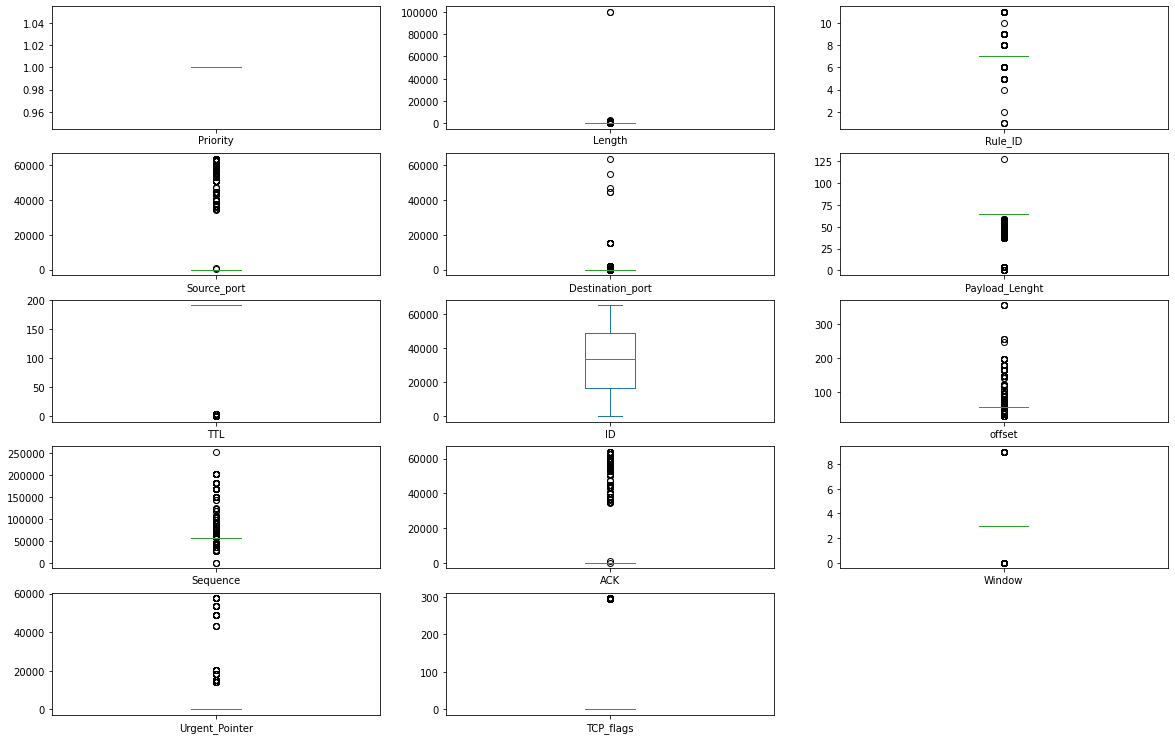

In [86]:
#Boxplot of all columns to see outliers
df_train.plot(kind='box',subplots=1,layout=(15,3),figsize=(20,40))
plt.show()

In [87]:
df_train['label'].value_counts()

Normal    5689
Attack     349
Name: label, dtype: int64

In [88]:
df_train.select_dtypes(['object']).columns

Index(['Rule_message', 'Protocol', 'Source_IP', 'Destination_IP', 'Source_MAC',
       'Destination_MAC', 'Vlan_Id', 'label'],
      dtype='object')

<a id="4"></a> <br>
# Encoding

In [89]:
# Label Encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['Rule_message', 'Protocol', 'Source_IP', 'Destination_IP', 'Source_MAC',
       'Destination_MAC', 'Vlan_Id', 'label']
for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    

<a id="5"></a> <br>
# Spliting 

In [90]:
#Spliting the data

x_train=df_train.drop('label',axis=1)
y_train=df_train["label"]




<a id="6"></a> <br>
# Feature Engineering

In [64]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

TTL                 0.222280
Window              0.221618
Rule_message        0.221425
Length              0.220955
Sequence            0.218233
offset              0.218111
Vlan_Id             0.216566
Source_IP           0.175494
Destination_IP      0.175442
Destination_MAC     0.174837
Rule_ID             0.173828
Source_MAC          0.172743
Protocol            0.147976
Destination_port    0.140917
Source_port         0.139553
ACK                 0.138559
Payload_Lenght      0.136463
ID                  0.071527
Urgent_Pointer      0.043512
TCP_flags           0.040884
Priority            0.000000
dtype: float64

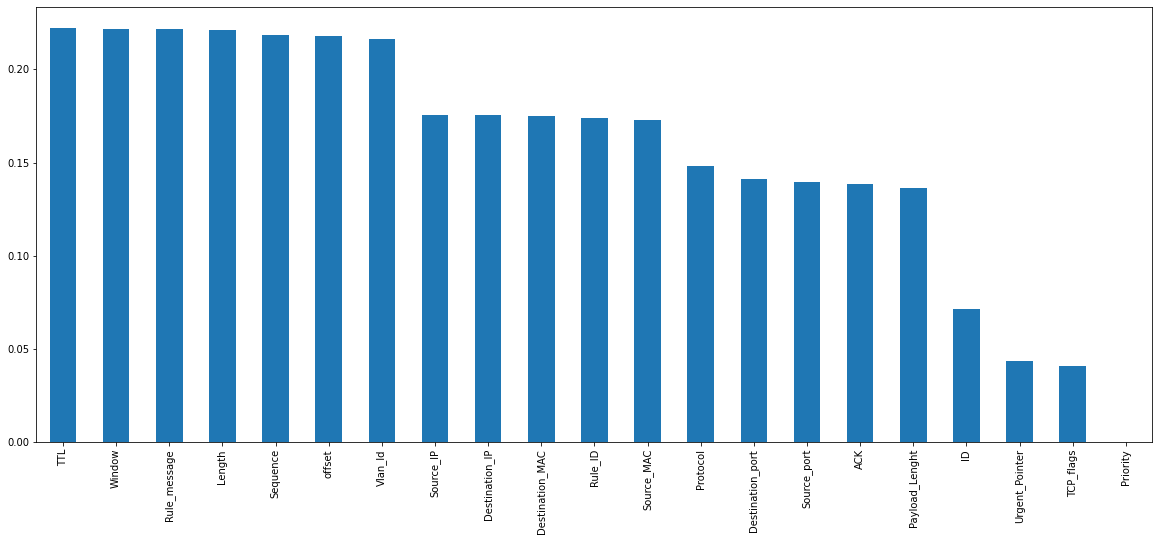

In [65]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));


In [66]:
# I will choose 17 features to select
# from sklearn.feature_selection import SelectKBest
# sel_five_cols = SelectKBest(mutual_info_classif, k=17)
# sel_five_cols.fit(x_train, y_train)
# x_train.columns[sel_five_cols.get_support()]

Index(['Length', 'Rule_ID', 'Rule_message', 'Protocol', 'Source_IP',
       'Source_port', 'Destination_IP', 'Destination_port', 'Source_MAC',
       'Destination_MAC', 'Vlan_Id', 'Payload_Lenght', 'TTL', 'offset',
       'Sequence', 'ACK', 'Window'],
      dtype='object')

In [67]:
# col=['Length', 'Rule_ID', 'Rule_message', 'Protocol', 'Source_IP',
#        'Source_port', 'Destination_IP', 'Destination_port', 'Source_MAC',
#        'Destination_MAC', 'Vlan_Id', 'Payload_Lenght', 'TTL', 'offset',
#        'Sequence', 'ACK', 'Window']
# x_train=x_train[col]

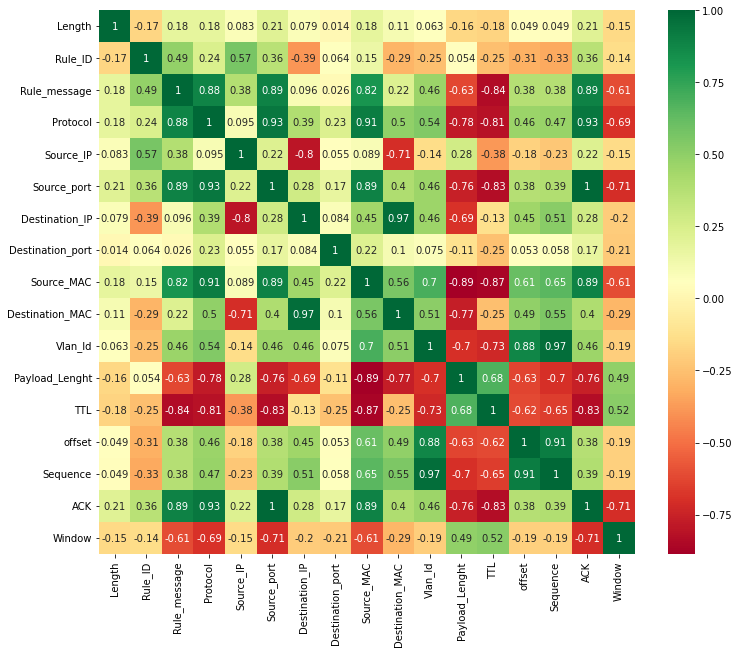

In [68]:
plt.figure(figsize=(12,10))
p=sns.heatmap(x_train.corr(), annot=True,cmap ='RdYlGn')  

In [95]:
from imblearn.over_sampling import SMOTE

# Define X and y (assuming X contains the numerical data and y contains the class labels)
# X = ...
# y = ...

# Instantiate SMOTE object
smote = SMOTE()

# Resample the data
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [112]:
x_train, x_test, y_train, y_test=train_test_split(X_resampled,y_resampled, test_size = 0.3)

<a id="7"></a> <br>
# Scaling

In [108]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train= scaler.fit_transform(x_train)
# x_test= scaler.fit_transform(x_test)

<a id="8"></a> <br>
# Binary classification models

In [119]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
# from sklearn.linear_model import LogisticRegression
# models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
# models['Support Vector Machines linear'] = LinearSVC()
models['Support Vector Machines'] = SVC(kernel='poly')
# models['Support Vector Machines RBf'] =  SVC(C=100.0)

# # Decision Trees
# from sklearn.tree import DecisionTreeClassifier
# models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# # Random Forest
# from sklearn.ensemble import RandomForestClassifier
# models['Random Forest'] = RandomForestClassifier(n_estimators=1)

# # Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)



In [120]:
# we'll loop over each one, train it by calling .fit(), make predictions, calculate metrics, and store each result in a dictionary.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(x_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(x_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [121]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Support Vector Machines,0.998749,0.999157,0.998315
K-Nearest Neighbor,0.997499,0.995784,0.999154


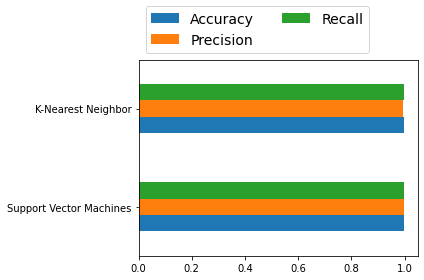

In [122]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [128]:
# from sklearn.metrics import plot_roc_curve
# from scikitplot.metrics import plot_roc_curve
# for key in models.keys():
#     plot_roc_curve( models[key], x_test, y_test)

### As we can see Randon forest and Decision tree classifiers are the best calssifiers for our data 